In [1]:
from qiskit import IBMQ, QuantumRegister, QuantumCircuit
from qiskit import transpile, schedule as build_schedule
from qiskit.circuit import Gate
from qiskit.ignis.verification.tomography import process_tomography_circuits
from qiskit.test.mock import FakeValencia
from calibrations import resolve_cx, cx_circuit

In [2]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibm_lagos')

## Direction (1, 3)

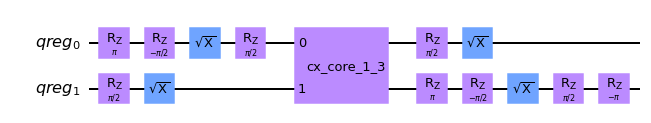

In [3]:
pre, core, post = resolve_cx(backend, 1, 3)

core_gate = Gate('cx_core_1_3', 2, [])

circuit = QuantumCircuit(QuantumRegister(2, name='qreg'))
circuit.compose(pre, qubits=(0, 1), inplace=True)
circuit.append(core_gate, (0, 1))
circuit.compose(post, qubits=(0, 1), inplace=True)

circuit.add_calibration('cx_core_1_3', (1, 3), core)
circuit.draw('mpl')

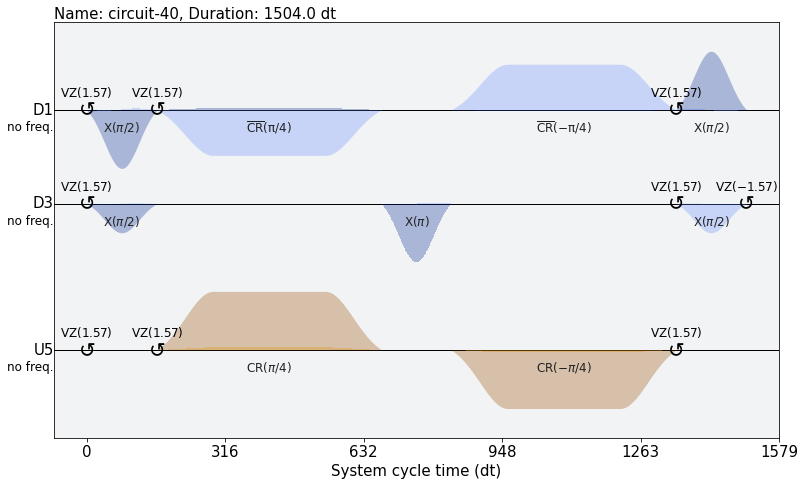

In [4]:
circuit_t = transpile(circuit, backend=backend, initial_layout=[1, 3])
build_schedule(circuit_t, backend=backend).draw()

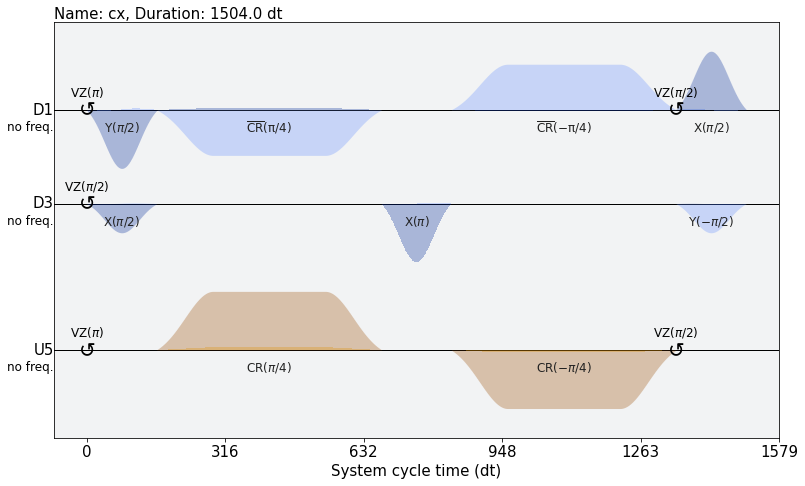

In [5]:
backend.defaults().instruction_schedule_map.get('cx', (1, 3)).draw()

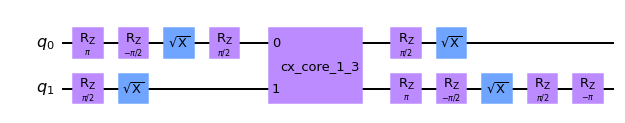

In [6]:
circuit = QuantumCircuit(2)
circuit.compose(cx_circuit(1, 3, backend), qubits=(0, 1), inplace=True)
circuit.draw('mpl')

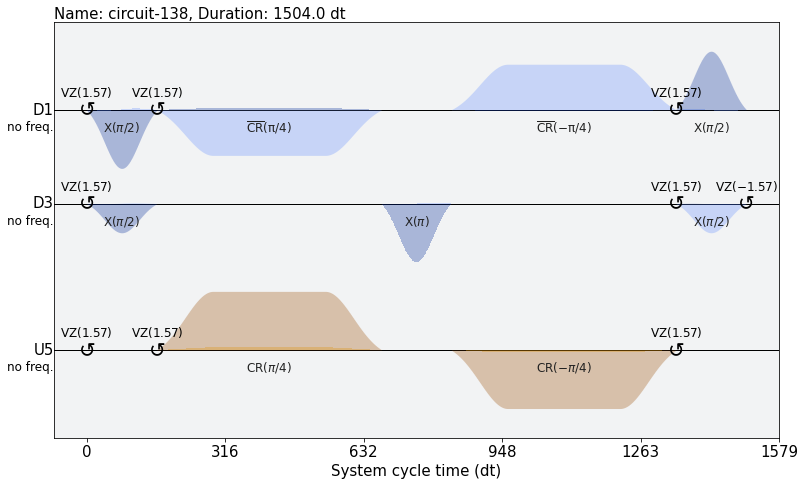

In [7]:
circuit_t = transpile(circuit, backend=backend, initial_layout=[1, 3])
build_schedule(circuit_t, backend=backend).draw()

## Direction (3, 1)

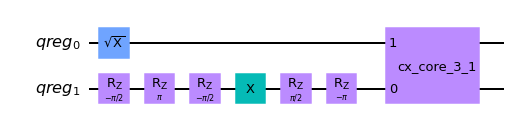

In [8]:
pre, core, post = resolve_cx(backend, 3, 1)

core_gate = Gate('cx_core_3_1', 2, [])

circuit = QuantumCircuit(QuantumRegister(2, name='qreg'))
circuit.compose(pre, qubits=(1, 0), inplace=True)
circuit.append(core_gate, (1, 0))
circuit.compose(post, qubits=(1, 0), inplace=True)

circuit.add_calibration('cx_core_3_1', (3, 1), core)
circuit.draw('mpl')

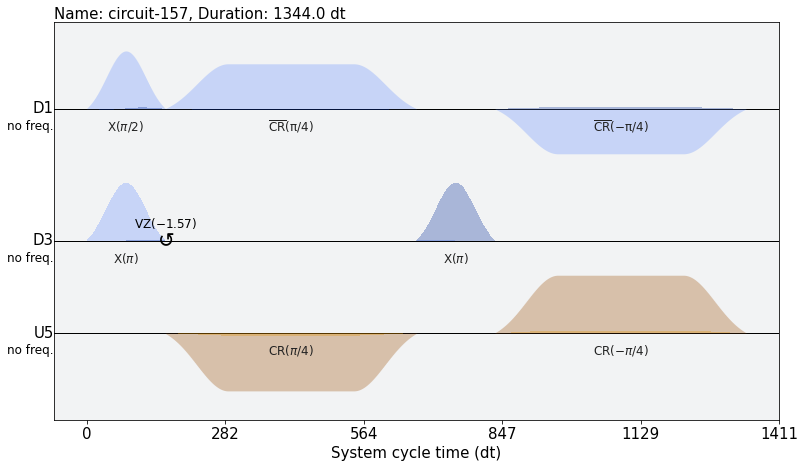

In [9]:
circuit_t = transpile(circuit, backend=backend, initial_layout=[1, 3])
build_schedule(circuit_t, backend=backend).draw()

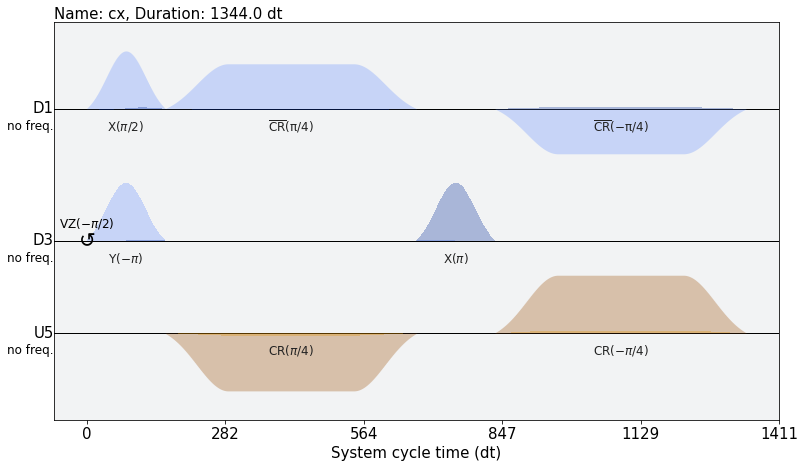

In [10]:
backend.defaults().instruction_schedule_map.get('cx', (3, 1)).draw()

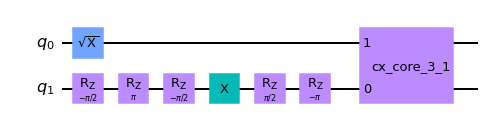

In [11]:
circuit = QuantumCircuit(2)
circuit.compose(cx_circuit(3, 1, backend), qubits=(1, 0), inplace=True)
circuit.draw('mpl')

In [12]:
circuit.calibrations

{'cx_core_3_1': {((3, 1),
   ()): Schedule((0, Play(GaussianSquare(duration=512, amp=(0.07614738081184641-0.0027137600320686897j), sigma=64, width=256, name='CR90p_d1_u5'), DriveChannel(1), name='CR90p_d1_u5')), (0, Play(GaussianSquare(duration=512, amp=(-0.02185658307629814-0.5026545554432252j), sigma=64, width=256, name='CR90p_u5'), ControlChannel(5), name='CR90p_u5')), (512, Play(Drag(duration=160, amp=(0.21966836453360875+0j), sigma=40, beta=-0.8122854580010029, name='Xp_d3'), DriveChannel(3), name='Xp_d3')), (672, Play(GaussianSquare(duration=512, amp=(-0.07614738081184641+0.002713760032068699j), sigma=64, width=256, name='CR90m_d1_u5'), DriveChannel(1), name='CR90m_d1_u5')), (672, Play(GaussianSquare(duration=512, amp=(0.021856583076298203+0.5026545554432252j), sigma=64, width=256, name='CR90m_u5'), ControlChannel(5), name='CR90m_u5')), name="cx_core_3_1")}}

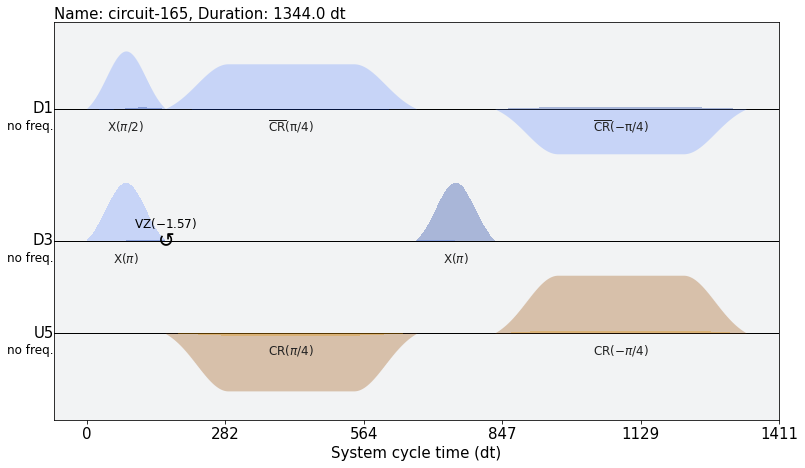

In [13]:
circuit_t = transpile(circuit, backend=backend, initial_layout=[1, 3])
build_schedule(circuit_t, backend=backend).draw()